Este notebook está creado a partir del ejemplo proporcionado por el profesor Antonio Rodríguez Anaya y contiene parte del código que él desarrolló.

In [1]:
#Import
import os
import pandas as pd
import numpy as np
import sklearn as skl
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sn
import collections

## Métricas

In [2]:
# Lee el csv con las métricas
df_metricas = pd.read_csv('metricas.csv')

# Quita las métricas que no nos interesan
df_metricas = df_metricas.drop(columns = ['Label','timeset','Eccentricity','harmonicclosnesscentrality','weighted degree',
                                          'closnesscentrality','betweenesscentrality'])

# Lee el csv con la lista de concejales
df_concejales = pd.read_csv('concejales.csv')

# Pasa los username a minúscula para que esté cono en df_metricas
df_concejales['username'] = df_concejales['username'].str.lower()

# Convierte el campo 'username' en índice para luego hacer el join
df_concejales = df_concejales.set_index('username')

# Lista de métricas que se van a usar
lista_metricas = ['weighted indegree', 'weighted outdegree', 'eigencentrality']

# Hace un join para que df_metricas tenga info sobre los partidos
df_metricas = df_metricas.join(df_concejales, on='Id')
df_metricas

,Id,weighted indegree,weighted outdegree,eigencentrality,modularity_class,partido
0,rita_maestre,293,47,0.727445,2,MásMadrid
1,jorgegcastano,133,216,0.379229,2,MásMadrid
2,jlnietob,43,118,0.229846,2,MásMadrid
3,esther_gomez_m,129,130,0.418827,2,MásMadrid
4,javierbarberog,86,51,0.344406,2,MásMadrid
5,almeidapp_,857,10,1.000000,0,PP
6,alevysoler,102,5,0.684134,0,PP
7,bcarabante,316,91,0.869741,0,PP
8,begonavillacis,487,76,0.817420,3,Ciudadanos
9,enmalopez,109,320,0.578985,1,PSOE


In [3]:
# Agrupa por partidos para sacar la media de las métricas
df_mean = df_metricas.groupby('partido').mean()

# Saca una lista con los partidos
lista_partidos = df_mean.index

A continuación se dibujan bar plots comparando la media de las métricas de los partidos

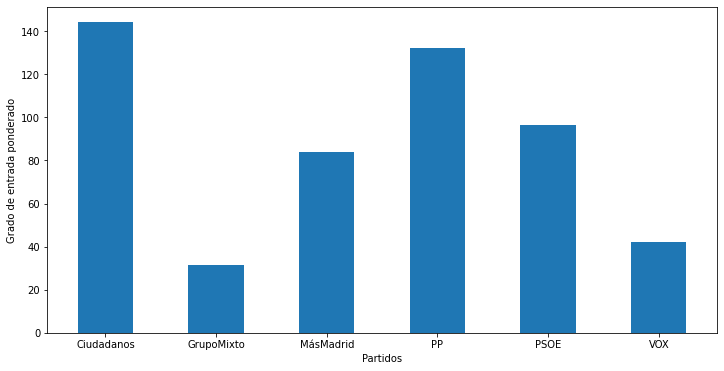

In [4]:
fig = plt.figure(figsize = (12, 6))

plt.bar(lista_partidos, df_mean['weighted indegree'], 
        width = 0.5)
plt.xlabel("Partidos")
plt.ylabel("Grado de entrada ponderado")
plt.show()

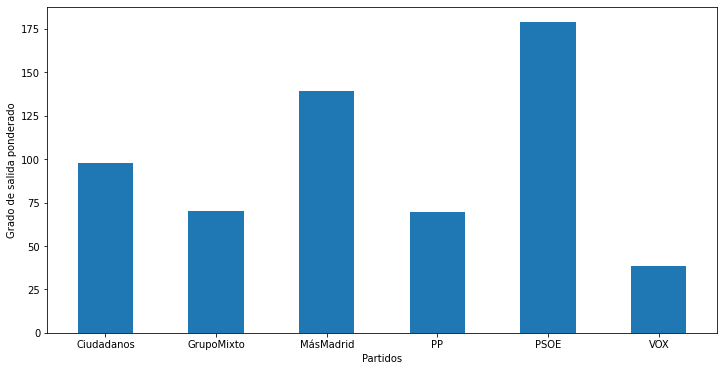

In [5]:
fig = plt.figure(figsize = (12, 6))

plt.bar(lista_partidos, df_mean['weighted outdegree'], 
        width = 0.5)
plt.xlabel("Partidos")
plt.ylabel("Grado de salida ponderado")
plt.show()

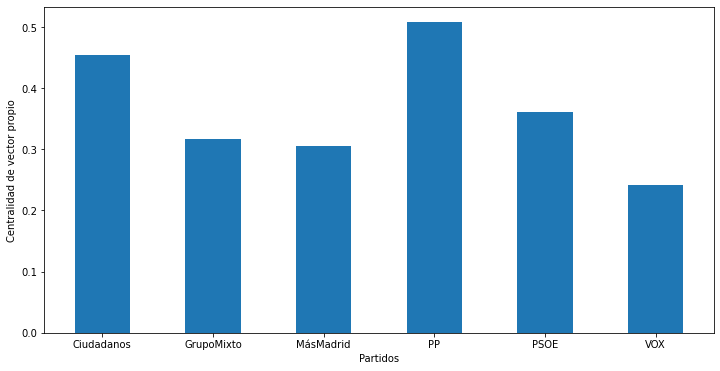

In [6]:
fig = plt.figure(figsize = (12, 6))

plt.bar(lista_partidos, df_mean['eigencentrality'], 
        width = 0.5)
plt.xlabel("Partidos")
plt.ylabel("Centralidad de vector propio")
plt.show()

A continuación se hace un histograma de cada métrica.

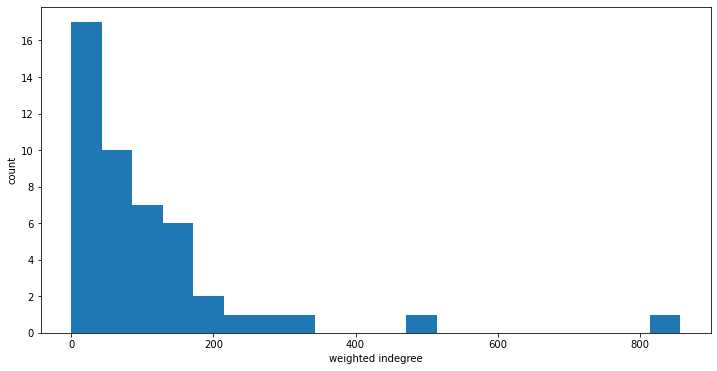

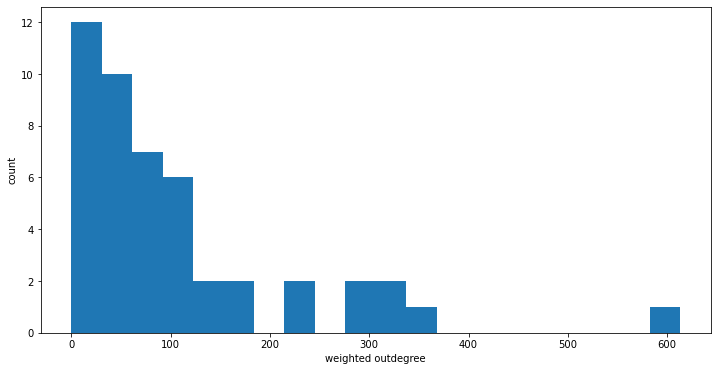

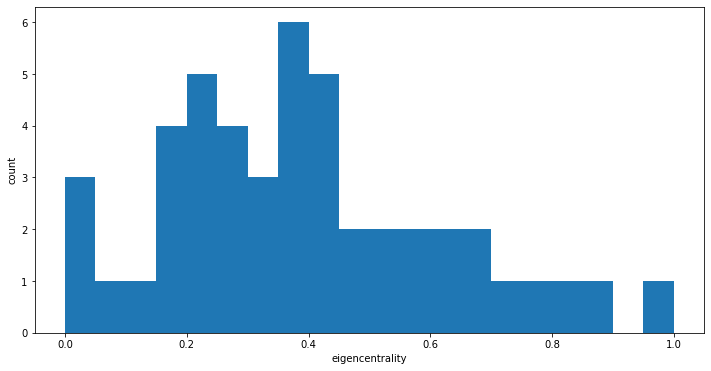

In [7]:
for metrica in lista_metricas:
    fig = plt.figure(figsize = (12, 6))
    plt.hist(df_metricas[metrica], bins = 20)
    plt.ylabel('count')
    plt.xlabel(metrica)
    plt.show()

Como parece que hay cierta corrlación entre el grado de entrada y la centralidad de vector propio se dibuja un scatterplot de los dos y se calcula la correlación tras normalizar el grado de entrada.

La correlación es 0.7725735396912333


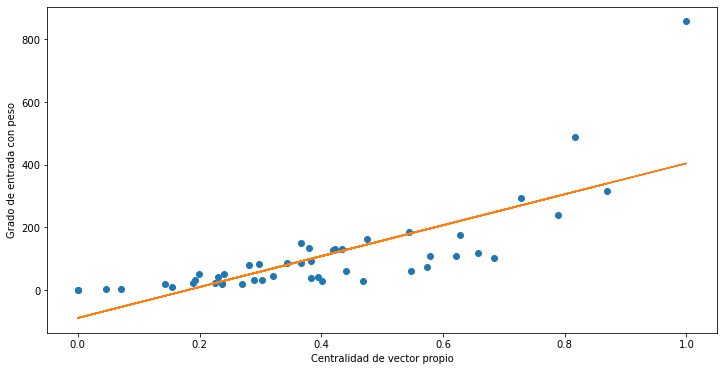

In [8]:
# Dibuja un scatterplot de weighted indegree vs eigencentrality
fig = plt.figure(figsize = (12, 6))
plt.ylabel('Grado de entrada con peso')
plt.xlabel('Centralidad de vector propio')
y = df_metricas['weighted indegree'].values
x = df_metricas['eigencentrality'].values
plt.plot(x, y, 'o')

# Calcula la pendiente y la ordenada en el origen para pintar la recta de regresión
m, b = np.polyfit(x, y, 1)

# Añade la recta al scatterplot
plt.plot(x, m*x+b)

# Calcula la correlación de ambas variables
corr = stats.pearsonr(y,x)[0]
print('La correlación es ' + str(corr))


## Clustering mediante aprendizaje no supervisado

Se calcula el coeficiente de silueta para ver que número de clústeres es el mejor

In [9]:
X = df_metricas[lista_metricas]

for k in range(2,47):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit(X)
    coef = metrics.silhouette_score(X, clusters.labels_, metric='euclidean')
    print('#Clusters = ' + str(k) + ' score = ' + str(coef))


#Clusters = 2 score = 0.71003316739028
#Clusters = 3 score = 0.6045198477719191
#Clusters = 4 score = 0.6265517608287265
#Clusters = 5 score = 0.6082757807881919
#Clusters = 6 score = 0.42957833841433185
#Clusters = 7 score = 0.3966636983560442
#Clusters = 8 score = 0.41113884541250717
#Clusters = 9 score = 0.4243851126879643
#Clusters = 10 score = 0.4252434885059275
#Clusters = 11 score = 0.4311855961016171
#Clusters = 12 score = 0.4713456008273269
#Clusters = 13 score = 0.47084524246524373
#Clusters = 14 score = 0.41721512133099964
#Clusters = 15 score = 0.47503107253064114
#Clusters = 16 score = 0.44797773824915793
#Clusters = 17 score = 0.4221973887112191
#Clusters = 18 score = 0.42215721028295844
#Clusters = 19 score = 0.3979358958461475
#Clusters = 20 score = 0.4089349734883444
#Clusters = 21 score = 0.4231198316632562
#Clusters = 22 score = 0.3914876207548884
#Clusters = 23 score = 0.38962155147970196
#Clusters = 24 score = 0.3550278720282299
#Clusters = 25 score = 0.33649208044

A pesar de que según el coeficiente de silueta el número óptimo de clústeres es 2, se va a dividir en 6 para ver si coincide con la agrupación por partidos.

In [10]:
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit(X)
df_metricas['Cluster'] = clusters.labels_

## Similaridad

In [11]:
# A partir de las aristas de la red crea la matriz de adyacencia llena con los valores de coeficiente de Pearson
def getCorrelationMatrix(dataframe):
    
    # Dataframe edges
    edges = dataframe.copy()
    edges = edges[['source', 'target']]
    
    # Lista nodes
    source_list = dataframe['source'].tolist()
    target_list = dataframe['target'].tolist()
    nodes = list(set(source_list + target_list))
    
    # Creación matriz de adyacencia
    ady_edges = pd.DataFrame(index = nodes, columns = nodes)
    ady_edges.loc[:,:] = 0
    
    # Rellena la matriz de adyacencia con los pesos de las aristas
    for x, row in edges.iterrows():
        source_name = row[0]
        target_name = row[1]
        ady_edges.at[source_name, target_name] += 1
        
    # Crea una matriz y la rellena con los soeficientes de correlación
    ady_edges_pearson = ady_edges.copy()
    for i in range(ady_edges.shape[0]):
        for j in range(ady_edges.shape[0]):
            results = stats.pearsonr(ady_edges.iloc[i],ady_edges.iloc[j])
            ady_edges_pearson.iat[i,j] = results[0]
        
    return ady_edges_pearson


In [12]:
# Dada una matriz de adyacencia devuelve numpy array con los valores por encima de la diagonal principal
def getUniqueValues(dataframe):
    valores_unicos = []
    
    # Recorre la matriz entera y solo coge los valores por encima de la diagonal principal
    for x in range(len(dataframe)):
        for y in range(len(dataframe)):
            if y > x:
                valores_unicos.append(dataframe.iloc[x,y])
    # Convierte la lista en un array de numpy            
    valores_unicos = np.array(valores_unicos)
    
    # Quita los 'NaN'
    valores_unicos = valores_unicos[np.logical_not(np.isnan(valores_unicos))]
    return valores_unicos
    

In [13]:
# Dadas las aristas de una red calcula el valor primedio de la similaridad
def getSimilarityMean(dataframe):
    corr_matrix = getCorrelationMatrix(dataframe)
    valores_unicos = getUniqueValues(corr_matrix)
    return valores_unicos.mean()

In [14]:
# Dadas las aristas de una red y una columna por la que agrupar, devuelve un diccionario con la similaridad promedio de cada grupo 
def similarityEachGroup(dataframe, column):
    # Obtiene los grupos 
    groups = dataframe[column].unique()
    means = {}
    for group in groups:
        
        # Obtiene un dataframe en el que todos los nodos source pertenezcan al grupo
        sliced_df = dataframe[dataframe[column]==group]
        
        # En algunos casos interesa que el target también pertenezca al grupo
        if column + '_target' in sliced_df.columns:
            sliced_df = sliced_df[sliced_df[column + '_target']==group]
        
        # Calcula la similaridad promedio y la añade al diccionario
        means[group] = getSimilarityMean(sliced_df)
        
    return means        

In [15]:
# Lee el csv con información sobre las aristas
df_edges = pd.read_csv('grafo_concejales.csv')

# Crea un dataframe con las etiquetas de partido, modularidad y clúster
df_labels = df_metricas[['Id','modularity_class', 'partido', 'Cluster']]
df_labels = df_labels.set_index('Id')


# Hace join para que df_edges tenga información sobre partidos, modularidad y clústeres
df_edges = df_edges.join(df_labels, on='source', rsuffix='_source')
df_edges = df_edges.join(df_labels, on='target', rsuffix='_target')

# Saca una columna con el año y el mes
df_edges['start'] = pd.to_datetime(df_edges['start'])
df_edges['start'] = df_edges['start'].dt.to_period('M')
df_edges['start'] = df_edges['start'].astype(str)


df_edges

,source,target,start,modularity_class,partido,Cluster,modularity_class_target,partido_target,Cluster_target
0,rita_maestre,jorgegcastano,2021-02,2,MásMadrid,4,2,MásMadrid,1
1,rita_maestre,jorgegcastano,2020-09,2,MásMadrid,4,2,MásMadrid,1
2,rita_maestre,jorgegcastano,2020-07,2,MásMadrid,4,2,MásMadrid,1
3,rita_maestre,jlnietob,2020-04,2,MásMadrid,4,2,MásMadrid,3
4,rita_maestre,jorgegcastano,2020-04,2,MásMadrid,4,2,MásMadrid,1
...,...,...,...,...,...,...,...,...,...
5016,luiscueto12,palomagromero,2021-11,2,GrupoMixto,3,0,PP,0
5017,luiscueto12,josemanuel_co,2021-11,2,GrupoMixto,3,4,GrupoMixto,3
5018,luiscueto12,palomagromero,2021-11,2,GrupoMixto,3,0,PP,0
5019,luiscueto12,almeidapp_,2021-11,2,GrupoMixto,3,0,PP,2


In [16]:
# Calcula la similaridad promedio de la red completa
whole_net_similarity = getSimilarityMean(df_edges)
whole_net_similarity

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


0.2684411020975563

In [17]:
# Calcula la similaridad promedio de cada partido
mean_partidos = similarityEachGroup(df_edges, 'partido')
mean_partidos

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


{'MásMadrid': 0.274232264876762,
 'PP': 0.3999135696071207,
 'Ciudadanos': 0.2642698870573085,
 'PSOE': -0.08494479800813325,
 'VOX': -0.7019158563540911,
 'GrupoMixto': -1.0}

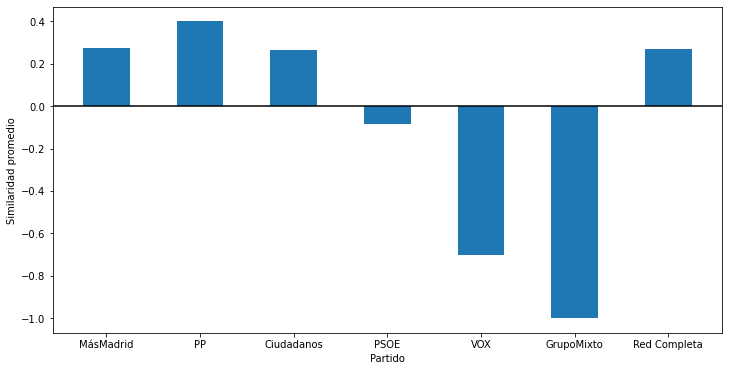

In [18]:
# Dibuja la similaridad promedio de cada partido
fig = plt.figure(figsize = (12, 6))

xaxis = list(mean_partidos.keys()) + ['Red Completa']
yaxis = list(mean_partidos.values()) + [whole_net_similarity]
plt.bar(xaxis, yaxis, 
        width = 0.5)
plt.axhline(y=0,color='black')
plt.xlabel("Partido")
plt.ylabel("Similaridad promedio")
plt.show()

In [19]:
# Calcula la similaridad promedio de cada clase de modularidad
mean_classes = similarityEachGroup(df_edges, 'modularity_class')
mean_classes

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is co

{2: 0.26713213634986904,
 4: 0.03517910429704246,
 0: 0.43075698492386466,
 3: 0.26843576167782246,
 1: 0.1827362220348014,
 5: nan}

In [20]:
# Quita el nan
mean_classes.pop(5)

# Ordena el diccionario por la clave
mean_classes = collections.OrderedDict(sorted(mean_classes.items()))

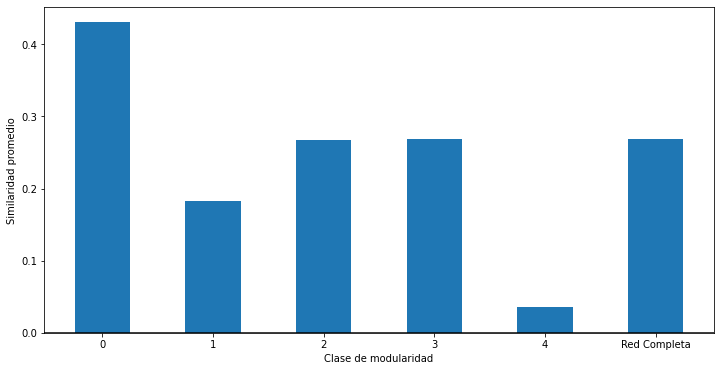

In [21]:
# Dibuja la similaridad promedio de cada clase de modularidad
fig = plt.figure(figsize = (12, 6))


xaxis = [str(x) for x in mean_classes.keys()] + ['Red Completa']
yaxis = list(mean_classes.values()) + [whole_net_similarity]
plt.bar(xaxis, yaxis, 
        width = 0.5)
plt.axhline(y=0,color='black')
plt.xlabel("Clase de modularidad")
plt.ylabel("Similaridad promedio")
plt.show()

In [22]:
# Calcula la similaridad promedio de cada clúster
mean_clusters = similarityEachGroup(df_edges, 'Cluster')
mean_clusters

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\alfoz\AppData\Local\Temp\ipykernel_8944\603324393.py:5: RuntimeWarning: Mean of empty slice.
  return valores_unicos.mean()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\alfoz\AppData\Local\Temp\ipykernel_8944\603324393.py:5: RuntimeWarning: Mean of empty slice.
  return valores_unicos.mean()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{4: -0.3333333333333333,
 1: -0.11074659179926792,
 0: 0.02520585493429452,
 3: 0.016845716437505643,
 5: nan,
 2: nan}

In [23]:
# Quita los nan
mean_clusters.pop(2)
mean_clusters.pop(3)

# Ordena el diccionario por la clave
mean_clusters = collections.OrderedDict(sorted(mean_clusters.items()))

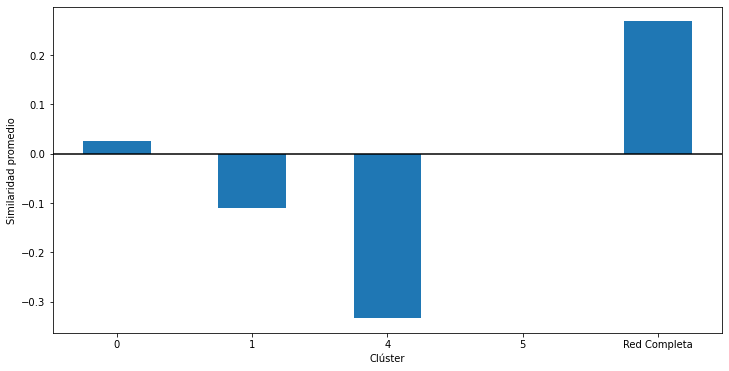

In [24]:
# Dibuja la similaridad promedio de cada clúster
fig = plt.figure(figsize = (12, 6))

xaxis = [str(x) for x in mean_clusters.keys()] + ['Red Completa']
yaxis = list(mean_clusters.values()) + [whole_net_similarity]
plt.bar(xaxis, yaxis, 
        width = 0.5)
plt.axhline(y=0,color='black')
plt.xlabel("Clúster")
plt.ylabel("Similaridad promedio")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is co

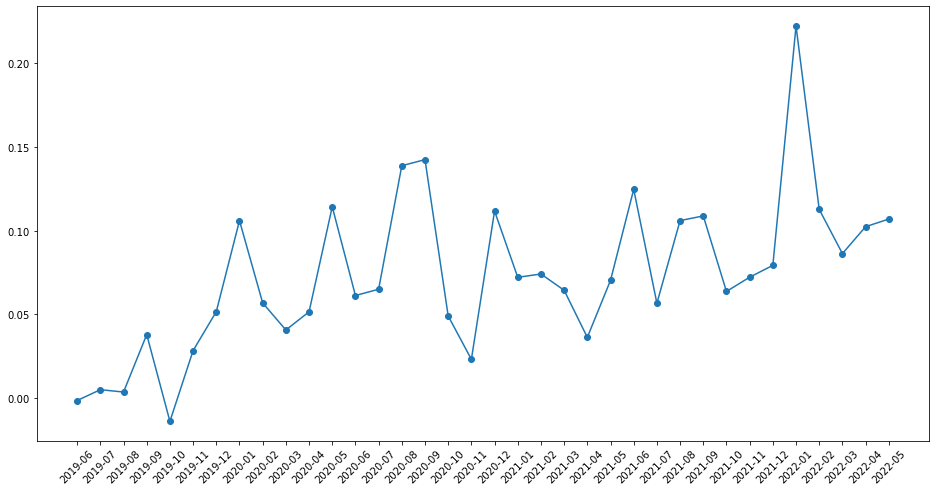

In [25]:
# Dibuja la siimlaridad promedio de la red cada mes
diccionario = similarityEachGroup(df_edges, 'start')
od = collections.OrderedDict(sorted(diccionario.items()))
fig, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation = 45)
ax.plot(od.keys() , od.values(), marker='o');

## Mapas de calor

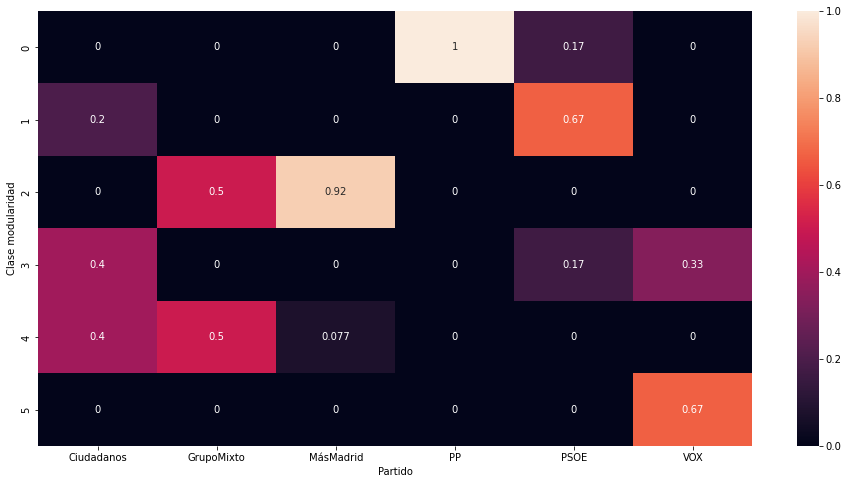

In [26]:
confusion_matrix = pd.crosstab(df_labels['modularity_class'], df_labels['partido'], 
                               rownames=['Clase modularidad'], colnames=['Partido'],
                              normalize='columns')
fig = plt.figure(figsize = (16, 8))
sn.heatmap(confusion_matrix, annot=True)
plt.show()

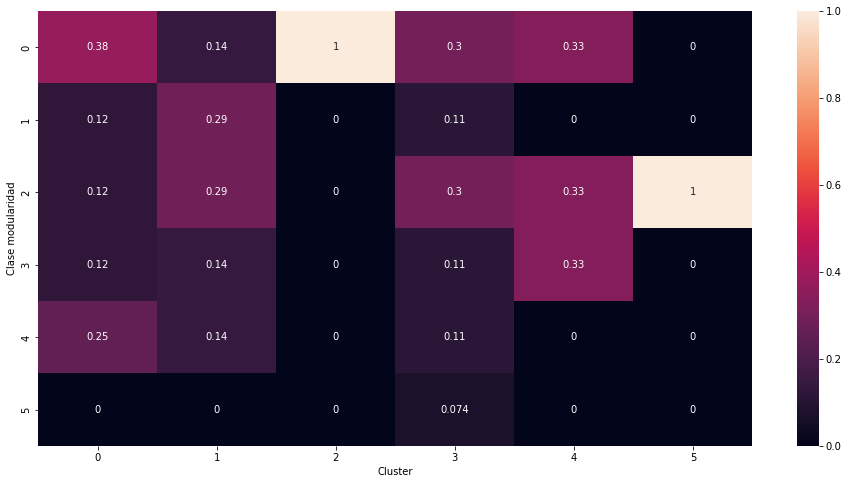

In [27]:
confusion_matrix = pd.crosstab(df_labels['modularity_class'], df_labels['Cluster'], 
                               rownames=['Clase modularidad'], colnames=['Cluster'],
                              normalize='columns')
fig = plt.figure(figsize = (16, 8))
sn.heatmap(confusion_matrix, annot=True)
plt.show()

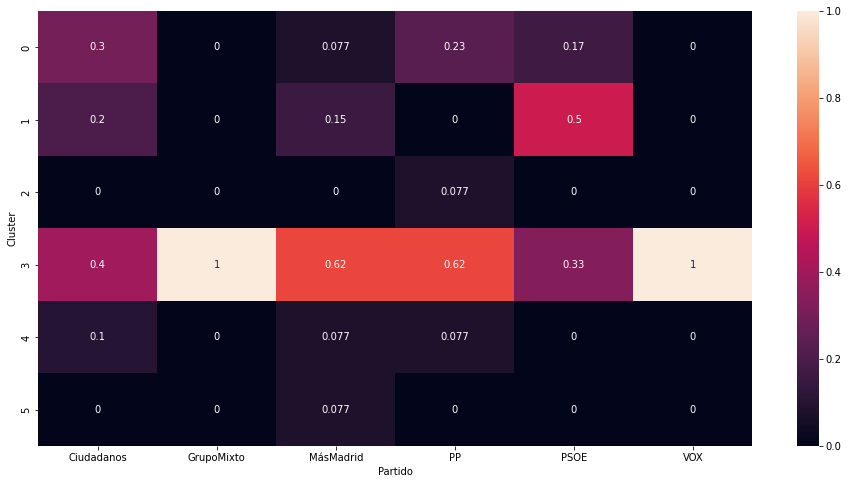

In [28]:
confusion_matrix = pd.crosstab(df_labels['Cluster'], df_labels['partido'], 
                               rownames=['Cluster'], colnames=['Partido'],
                              normalize='columns')
fig = plt.figure(figsize = (16, 8))
sn.heatmap(confusion_matrix, annot=True)
plt.show()